### Human Activity Recognition

In [17]:
# Loading necessary modules
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from  sklearn.decomposition import  PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import xgboost as xgb


pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading the dataset
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')


#### DATA PREPROCESSING

In [2]:
print('Train Subjects: {}'.format(len(train.subject.unique())))
print('Subjects IDs: {}'.format(train.subject.unique()))

print('Test Subjects: {}'.format(len(test.subject.unique())))
print('Subjects IDs: {}'.format(test.subject.unique()))

Train Subjects: 21
Subjects IDs: [ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
Test Subjects: 9
Subjects IDs: [ 2  4  9 10 12 13 18 20 24]


In [3]:
# Checking for missing values in both datasets
train_missing = train.isnull().sum().sum()
test_missing = test.isnull().sum().sum()

train_missing, test_missing

(0, 0)

In [4]:
# CHecking for Duplicates 
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [5]:
# Looking at data distribution.
fig = px.histogram(train, x='Activity', title='Data provided by each user', color="subject")#,pattern_shape="subject"
fig.show()
del fig

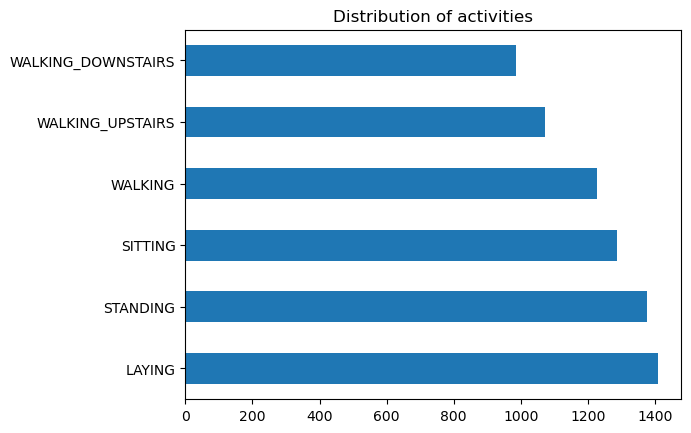

In [6]:
train["Activity"].value_counts(ascending=False).plot.barh()
_ = plt.title("Distribution of activities")

In [7]:
# CLeaning the column names
columns = train.columns

columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

In [8]:
#  Plotting Magnitude of an acceleration vs Different Activities
fig = px.box(train, x="Activity", y="tBodyAccMagmean", points="all")
fig.show()
del fig

In [9]:
fig = px.box(train, x="Activity", y="angleXgravityMean", points="all")
fig.show()
del fig

##### Feature importancce with RF

In [10]:
import time

feature_names = train.columns[0:-2].values
forest = RandomForestClassifier(random_state=0)
forest.fit(train.iloc[0:,0:-2], train.Activity)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.010 seconds


In [11]:
features_v               = pd.DataFrame()
features_v['Feature']    = train.columns[0:-2]
features_v['Importance'] = importances
features_v               = features_v.sort_values(by=['Importance'], ascending=False)
features_v               = features_v.reset_index()

features_v

,index,Feature,Importance
0,558,angleXgravityMean,0.036587
1,41,tGravityAccmeanY,0.033971
2,52,tGravityAccminX,0.033784
3,49,tGravityAccmaxX,0.027301
4,56,tGravityAccenergyX,0.023828
...,...,...,...
556,308,fBodyAccbandsEnergy4956,0.000089
557,387,fBodyAccJerkbandsEnergy4956,0.000088
558,256,tBodyGyroJerkMagmin,0.000077
559,367,fBodyAccJerkentropyY,0.000068


##### t-SNE for Visualization

In [12]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, \
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + 'perp{}iter{}.png'.format(perplexity, n_iter)
        plt.savefig(img_name)
        plt.show()
        

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.017s...
[t-SNE] Computed neighbors for 7352 samples in 2.296s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.219s
[t-SNE] Iteration 50: error = 89.2976685, gradient norm = 0.0321134 (50 iterations in 3.295s)
[t-SNE] Iteration 100: error = 82.9641724, gradient norm = 0.0076557 (50 iterations in 1.807s)
[t-SNE] Iteration 150: error = 81.5951538, gradient norm = 0

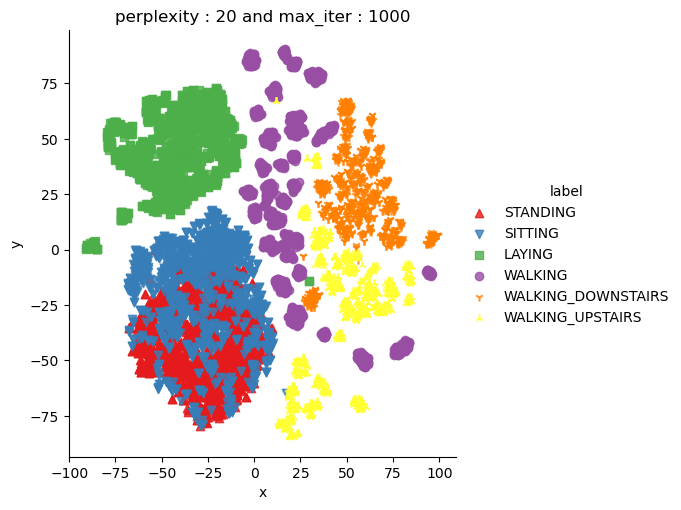

In [13]:
X_pre_tsne=train.drop(['subject','Activity'],axis=1)
y_pre_tsne=train['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[20])

##### PCA

In [14]:
data=pd.concat([train,test])
data=train.sample(frac=1)
f_df = data.loc[:, data.columns.str.contains('^f|^s|^a|^A')]
t_df = data.loc[:, data.columns.str.contains('^t|^s|^a|^A')]

X = data.drop(['subject', 'Activity'], axis=1)
y = data['Activity']

X_f = f_df.drop(['subject', 'Activity'], axis=1)
y_f = f_df['Activity']

X_t = t_df.drop(['subject', 'Activity'], axis=1)
y_t = t_df['Activity']

pca=PCA(n_components=0.99)
pca.fit(X)
x_reduced=pca.transform(X)



print('Frequency components number is {} Time components number is {}'.format(X_f.shape[1], X.shape[1] - X_f.shape[1]))
print('Original number of features {} Reduced number of features {}'.format(X.shape[1], x_reduced.shape[1]))

x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduced, y, test_size=0.2, shuffle=True, random_state=32)

Frequency components number is 296 Time components number is 265
Original number of features 561 Reduced number of features 155


In [15]:
label_encoder = LabelEncoder()
y_train_pca_encoded = label_encoder.fit_transform(y_train_pca)
y_test_pca_encoded = label_encoder.transform(y_test_pca)

In [18]:
# Random Forest hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid,
                              cv=5,  
                              verbose=2,  
                              n_jobs=-1)

# Fit the grid search to the data
rf_grid_search.fit(x_train_pca, y_train_pca_encoded)
print("Best parameters for Random Forest: ", rf_grid_search.best_params_)
print("Best score: ", rf_grid_search.best_score_)

# SVM hyperparameter grid
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

svm_grid_search = GridSearchCV(estimator=SVC(random_state=42),
                               param_grid=svm_param_grid,
                               cv=5, 
                               verbose=2,  
                               n_jobs=-1) 

# Fit the grid search to the data
svm_grid_search.fit(x_train_pca, y_train_pca_encoded)
print("Best parameters for SVM: ", svm_grid_search.best_params_)
print("Best score: ", svm_grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

[CV] END max_depth=None, max_features=auto, n_estimators=100; total time=  12.8s
[CV] END max_depth=None, max_features=auto, n_estimators=100; total time=  13.0s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, n_estimators=100; total time=  13.1s
[CV] END max_depth=None, max_features=auto, n_estimators=100; total time=  13.1s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, n_estimators=100; total time=  13.5s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, n_estimators=200; total time=  25.5s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, n_estimators=200; total time=  25.9s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, n_estimators=200; total time=  26.2s
[CV] END max_depth=None, max_features=auto, n_estimators=200; total time=  25.6s
[CV] END max_depth=None, max_features=auto, n_estimators=200; total time=  25.9s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100; total time=  12.7s
[CV] END max_depth=None, max_features=auto, n_estimators=300; total time=  38.2s
[CV] END max_depth=None, max_features=auto, n_estimators=300; total time=  38.2s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100; total time=  12.9s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100; total time=  13.0s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100; total time=  13.1s
[CV] END max_depth=None, max_features=auto, n_estimators=300; total time=  39.4s
[CV] END max_depth=None, max_features=auto, n_estimators=300; total time=  40.5s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100; total time=  14.8s
[CV] END max_depth=None, max

/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=log2, n_estimators=200; total time=  16.7s
[CV] END max_depth=None, max_features=log2, n_estimators=200; total time=  16.3s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=10, max_features=auto, n_estimators=100; total time=  10.2s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=log2, n_estimators=300; total time=  24.6s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=10, max_features=auto, n_estimators=100; total time=  10.2s
[CV] END ..max_depth=10, max_features=auto, n_estimators=100; total time=  10.1s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=log2, n_estimators=300; total time=  24.9s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=10, max_features=auto, n_estimators=100; total time=   9.9s
[CV] END max_depth=None, max_features=log2, n_estimators=300; total time=  24.4s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=log2, n_estimators=300; total time=  24.9s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=10, max_features=auto, n_estimators=100; total time=   9.5s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=log2, n_estimators=300; total time=  24.0s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=10, max_features=auto, n_estimators=200; total time=  19.0s
[CV] END ..max_depth=10, max_features=auto, n_estimators=200; total time=  19.1s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=10, max_features=auto, n_estimators=200; total time=  19.3s
[CV] END ..max_depth=10, max_features=auto, n_estimators=200; total time=  18.7s
[CV] END ..max_depth=10, max_features=auto, n_estimators=200; total time=  19.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=  10.7s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=  11.3s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=  11.2s
[CV] END ..max_depth=10, max_features=auto, n_estimators=300; total time=  30.5s
[CV] END ..max_depth=10, max_features=auto, n_estimators=300; total time=  30.6s
[CV] END ..max_depth=10, max_features=auto, n_estimators=300; total time=  30.4s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=  11.5s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=  11.8s
[CV] END ..max_depth=10, max_features=auto, n_estimators=300; total time=  32.8s
[CV] END ..max_depth=10, max

/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=10, max_features=log2, n_estimators=200; total time=  12.2s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=10, max_features=log2, n_estimators=300; total time=  18.5s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=10, max_features=log2, n_estimators=300; total time=  18.9s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=20, max_features=auto, n_estimators=100; total time=  12.6s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=20, max_features=auto, n_estimators=100; total time=  13.0s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=10, max_features=log2, n_estimators=300; total time=  19.2s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=10, max_features=log2, n_estimators=300; total time=  19.3s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=20, max_features=auto, n_estimators=100; total time=  13.5s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=10, max_features=log2, n_estimators=300; total time=  19.8s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=20, max_features=auto, n_estimators=100; total time=  14.4s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=20, max_features=auto, n_estimators=100; total time=  14.3s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=20, max_features=auto, n_estimators=200; total time=  25.1s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=20, max_features=auto, n_estimators=200; total time=  25.2s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=20, max_features=auto, n_estimators=200; total time=  24.6s
[CV] END ..max_depth=20, max_features=auto, n_estimators=200; total time=  24.5s
[CV] END ..max_depth=20, max_features=auto, n_estimators=200; total time=  24.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=100; total time=  11.5s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=100; total time=  11.8s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=100; total time=  11.8s
[CV] END ..max_depth=20, max_features=auto, n_estimators=300; total time=  36.0s
[CV] END ..max_depth=20, max_features=auto, n_estimators=300; total time=  34.2s
[CV] END ..max_depth=20, max_features=auto, n_estimators=300; total time=  35.3s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=100; total time=  11.7s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=100; total time=  11.5s
[CV] END ..max_depth=20, max_features=auto, n_estimators=300; total time=  35.2s
[CV] END ..max_depth=20, max

/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=20, max_features=log2, n_estimators=200; total time=  16.1s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=20, max_features=log2, n_estimators=200; total time=  16.2s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=30, max_features=auto, n_estimators=100; total time=  12.4s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=30, max_features=auto, n_estimators=100; total time=  12.3s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=20, max_features=log2, n_estimators=300; total time=  24.3s
[CV] END ..max_depth=20, max_features=log2, n_estimators=300; total time=  24.1s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=20, max_features=log2, n_estimators=300; total time=  23.7s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=20, max_features=log2, n_estimators=300; total time=  23.8s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=30, max_features=auto, n_estimators=100; total time=  12.0s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=20, max_features=log2, n_estimators=300; total time=  24.0s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=30, max_features=auto, n_estimators=100; total time=  12.2s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=30, max_features=auto, n_estimators=100; total time=  12.7s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=30, max_features=auto, n_estimators=200; total time=  23.5s
[CV] END ..max_depth=30, max_features=auto, n_estimators=200; total time=  23.8s


/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/kavyakasala/opt/anaconda3/envs/mclar/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END ..max_depth=30, max_features=auto, n_estimators=200; total time=  23.4s
[CV] END ..max_depth=30, max_features=auto, n_estimators=200; total time=  23.6s
[CV] END ..max_depth=30, max_features=auto, n_estimators=200; total time=  23.3s
[CV] END ..max_depth=30, max_features=sqrt, n_estimators=100; total time=  11.6s
[CV] END ..max_depth=30, max_features=sqrt, n_estimators=100; total time=  11.8s
[CV] END ..max_depth=30, max_features=sqrt, n_estimators=100; total time=  11.9s
[CV] END ..max_depth=30, max_features=auto, n_estimators=300; total time=  34.7s
[CV] END ..max_depth=30, max_features=auto, n_estimators=300; total time=  34.9s
[CV] END ..max_depth=30, max_features=auto, n_estimators=300; total time=  35.5s
[CV] END ..max_depth=30, max_features=sqrt, n_estimators=100; total time=  12.3s
[CV] END ..max_depth=30, max_features=sqrt, n_estimators=100; total time=  12.1s
[CV] END ..max_depth=30, max_features=auto, n_estimators=300; total time=  35.9s
[CV] END ..max_depth=30, max

In [19]:
# Predict using the best Random Forest model
y_pred_rf = rf_grid_search.predict(x_test_pca)

# Classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test_pca_encoded, y_pred_rf))

# Predict using the best SVM model
y_pred_svm = svm_grid_search.predict(x_test_pca)

# Classification report for SVM
print("SVM Classification Report:")
print(classification_report(y_test_pca_encoded, y_pred_svm))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       297
           1       0.94      0.86      0.90       245
           2       0.89      0.95      0.92       266
           3       0.97      0.98      0.97       219
           4       0.98      0.94      0.96       216
           5       0.95      0.98      0.96       228

    accuracy                           0.95      1471
   macro avg       0.95      0.95      0.95      1471
weighted avg       0.95      0.95      0.95      1471

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       297
           1       0.98      0.97      0.98       245
           2       0.97      0.98      0.98       266
           3       1.00      1.00      1.00       219
           4       1.00      1.00      1.00       216
           5       1.00      1.00      1.00       228

    accuracy 

- The low f1-score is seen in "SITTING" and "STANDING" classes in RF indicate slightly less performance distinguishing between these two postures, which can often be similar in terms of sensor readings.

##### Plotting decision boundaries

In [22]:
def plot_decision_boundary(X, y, model, title='Decision Boundary'):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02 
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.show()

In [23]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

# Splitting the data into train and test sets
x_train_pca_2d, x_test_pca_2d, y_train, y_test = train_test_split(X_pca_2d, y, test_size=0.2, shuffle=True, random_state=32)

In [24]:
label_encoder = LabelEncoder()

# Fitting label encoder and return encoded labels for the training and testing dataset
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [25]:
# Random Forest
rf_model_2d = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
rf_model_2d.fit(x_train_pca_2d, y_train_encoded)

# SVM
svm_model_2d = SVC(C=1, kernel='rbf', random_state=42)
svm_model_2d.fit(x_train_pca_2d, y_train_encoded)


SVC(C=1, random_state=42)

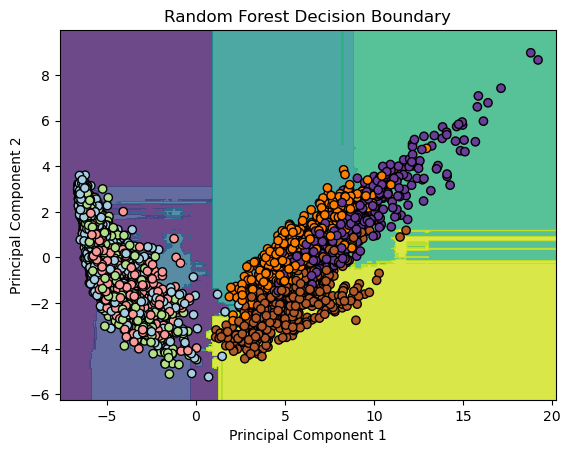

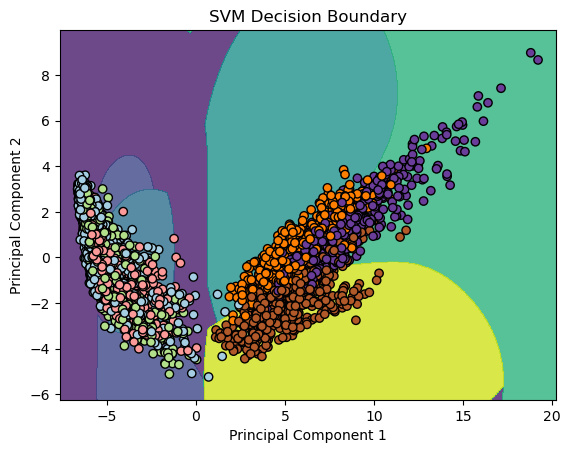

In [26]:
# Plotting the decision boundary for Random Forest
plot_decision_boundary(x_train_pca_2d, y_train_encoded, rf_model_2d, 'Random Forest Decision Boundary')

# Plotting the decision boundary for SVM
plot_decision_boundary(x_train_pca_2d, y_train_encoded, svm_model_2d, 'SVM Decision Boundary')

In [29]:
#  XGBoost hyperparameter grid
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.3, 0.7]
}

# Fit the grid search to the data
xgb_grid_search = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
                               param_grid=xgb_param_grid,
                               cv=3,  
                               verbose=2, 
                               n_jobs=-1)  

xgb_grid_search.fit(x_train_pca, y_train_pca_encoded)

# The best parameters and best score
print("Best parameters for XGBoost: ", xgb_grid_search.best_params_)
print("Best score: ", xgb_grid_search.best_score_)

# Predict using the best XGBoost model 
y_pred_xgb = xgb_grid_search.predict(x_test_pca)

# Classification report 
print("XGBoost Classification Report:")
print(classification_report(y_test_pca_encoded, y_pred_xgb, target_names=label_encoder.classes_))


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=  24.2s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=  24.3s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100; total time=  24.7s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time=  47.8s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time=  47.9s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200; total time=  48.1s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=100; total time=  38.6s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=100; total time=  38.9s
[CV] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=300; total time= 1.2min
[CV] END colsample_bytree=0.3